In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
print(sns.color_palette("Set2").as_hex())

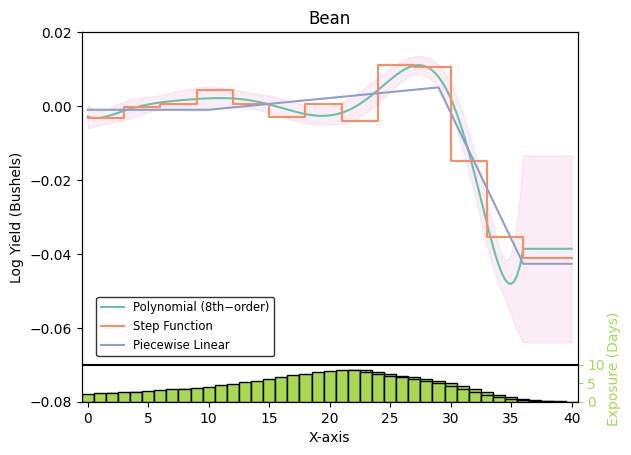

In [ ]:
import pandas as pd
df = pd.read_stata("Figure_1_DATA.dta")

# Creating a figure and axis for the plot and setting the title
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title("Bean")

# Plotting multiple line graphs on the primary axis
import seaborn as sns
ax1.plot(df["temperature"], df["b"], color=sns.color_palette("Set2").as_hex()[0], label='Line Graph')
ax1.plot(df["tempDummy"], df["bDummy"], color=sns.color_palette("Set2").as_hex()[1], label='Line Graph')
ax1.plot(df["temperature"], df["bLin"], color=sns.color_palette("Set2").as_hex()[2], label='Line Graph')

# Adding a confidence interval to the line graph
ax1.fill_between(df["temperature"], df["lb"], df["ub"], color=sns.color_palette("Set2").as_hex()[3], alpha=0.15, label='Confidence Interval')

# Configuring the primary y-axis label, color, and tick parameters
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Log Yield (Bushels)', color='black')
ax1.tick_params('y', colors='black')

# Drawing a horizontal line and setting axis margins and ticks on the primary y-axis
ax1.axhline(y=-0.07, color='black')
ax1.margins(0)
ax1.set_yticks([-0.08,-0.06,-0.04,-0.02,0,0.02])

# Creating a secondary y-axis for the bar plot
ax2 = ax1.twinx()

# Plotting a bar plot on the secondary y-axis with specific color, width, and edge properties
ax2.bar(df["tempHist"], df["bHist"], alpha=1, color=sns.color_palette("Set2").as_hex()[4], width=1, edgecolor='black', linewidth=1, label='Bar Plot')

# Setting secondary y-axis label and tick parameters
ax2.set_ylabel('Exposure (Days)', color=sns.color_palette("Set2").as_hex()[4])
ax2.tick_params('y', colors=sns.color_palette("Set2").as_hex()[4])

# Setting the range for both y-axes and defining tick marks for the secondary y-axis
ax1.set_ylim(-0.08, 0.02)
ax2.set_ylim(1, 100)
ax2.set_yticks([0,5,10])

# Displaying legends for both axes and adjusting their properties
legend = ax1.legend(bbox_to_anchor=(0, 4), fontsize='small')
ax1.legend(["Polynomial (8th−order)",'Step Function',"Piecewise Linear"],bbox_to_anchor=(0.4, 0.3), fontsize='small').get_frame().set_boxstyle('Square', pad=0)
ax1.legend(["Polynomial (8th−order)",'Step Function',"Piecewise Linear"],bbox_to_anchor=(0.4, 0.3), fontsize='small').get_frame().set_edgecolor('black')
ax2.yaxis.set_label_coords(1.06,0.09)
ax2.legend(loc='upper right')
ax2.get_legend().remove()

# Adjusting the position of the primary axis legend
legend.set_bbox_to_anchor((0.1, 0.34))

# Displaying the final plot
plt.show()


<ipython-input-27-e1ea027ff55a>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, fontweight='bold')


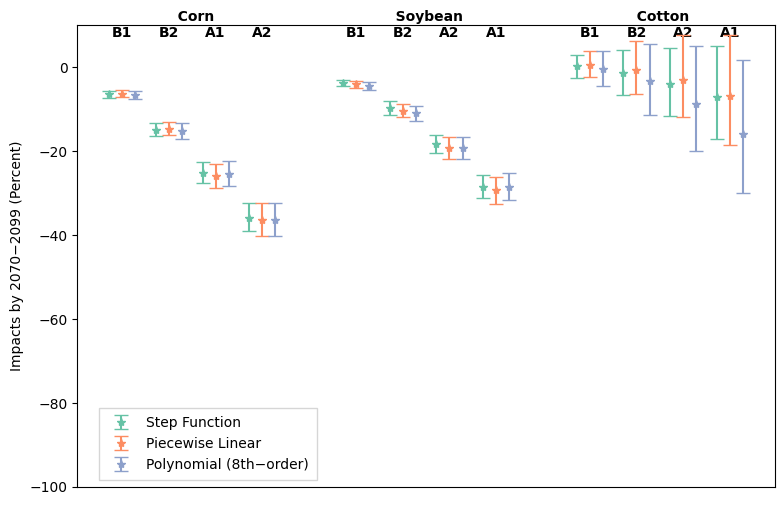

In [ ]:
# Importing pandas library and reading data from a Stata file
import pandas as pd
df2 = pd.read_stata("Figure_2_DATA.dta")

# Setting up a random seed for numpy and importing necessary matplotlib components
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

# Creating subsets of the dataframe based on the value of 'm'
df_m1 = df2[df2['m'] == 1]
df_m2 = df2[df2['m'] == 2]
df_m3 = df2[df2['m'] == 3]

# Setting up x-axis labels and adjusting the range
numbers = list(range(1, 15))
numbers.remove(5)
numbers.remove(10)
x = ["B1","           Corn\nB2","A1","A2","B1",
     "           Soybean\nB2","A2","A1","B1","           Cotton\nB2","A2","A1"]

# Creating a figure and setting its size
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

# Creating translation transformations for grouping error bars
trans1 = Affine2D().translate(-0.13, 0.0) + ax.transData
trans2 = Affine2D().translate(+0, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.13, 0.0) + ax.transData

# Plotting error bars for each group with customized transformations
import seaborn as sns
er1 = ax.errorbar(df_m1["x"], df_m1["b"], yerr=[df_m1["b"]-df_m1["lb"],df_m1["ub"]-df_m1["b"]],  fmt='*', linestyle="none", transform=trans1, capsize=5, color=sns.color_palette("Set2").as_hex()[0])
er2 = ax.errorbar(df_m2["x"], df_m2["b"], yerr=[df_m2["b"]-df_m2["lb"],df_m2["ub"]-df_m2["b"]],  fmt='*', linestyle="none", transform=trans2, capsize=5, color=sns.color_palette("Set2").as_hex()[1])
er3 = ax.errorbar(df_m3["x"], df_m3["b"], yerr=[df_m3["b"]-df_m3["lb"],df_m3["ub"]-df_m3["b"]],  fmt='*', linestyle="none", transform=trans3, capsize=5, color=sns.color_palette("Set2").as_hex()[2])

# Adjusting tick parameters, setting custom x and y ticks, labels, and adding a legend
ax.tick_params(axis='x', which='both', bottom=False, top=False, labeltop=True, labelbottom=False, direction="in", pad=-11)
ax.set_xticklabels(x, fontweight='bold')
ax.set_yticks([-100,-80,-60,-40,-20,0])
ax.set_xticks(numbers)
ax.set_xticklabels(x)
ax.legend(['Step Function',"Piecewise Linear","Polynomial (8th−order)"], bbox_to_anchor=(0.35, 0.18), fontsize='medium').get_frame().set_boxstyle('Square', pad=0.2)
ax.set_ylabel('Impacts by 2070−2099 (Percent)', color='black')

# Displaying the plot
plt.show()
